In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
df_codex_m = pd.read_csv('data/codex-m/results.csv',index_col=0)
df_codex_l = pd.read_csv('data/codex-l/results.csv',index_col=0)
df_codex_s = pd.read_csv('data/codex/results.csv',index_col=0)
df_freebase = pd.read_csv('data/freebase/results.csv',index_col=0)
df_eco = pd.read_csv('data/economic/results.csv',index_col=0)

In [35]:
df_eco

,Accuracy,F1 score,Recall,Precision
No context,0.534,0.613599,0.74,0.524079
With context,0.504,0.644699,0.90,0.502232
RAG-based,0.666,0.683112,0.72,0.649819


In [34]:
def create_res_dict(key):
    res_dict = {
    'codex-s' :df_codex_s.loc[key],
    'codex-m' :df_codex_m.loc[key],
    'codex-l' :df_codex_l.loc[key],
    'freebase' :df_freebase.loc[key],
    'eco' : df_eco.loc[key],
    }
    return res_dict

In [36]:
res_dict = create_res_dict('RAG-based')
res_context_dict = create_res_dict('With context')
res_no_context_dict = create_res_dict('No context')

/var/folders/_3/wtwzgv1d3rlfz233qkf36kg00000gp/T/ipykernel_33085/4205221552.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  accuracy_list = [val[0] for val in plot_dict.values()]
/var/folders/_3/wtwzgv1d3rlfz233qkf36kg00000gp/T/ipykernel_33085/4205221552.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f1_list = [val[1] for val in plot_dict.values()]
/var/folders/_3/wtwzgv1d3rlfz233qkf36kg00000gp/T/ipykernel_33085/4205221552.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior)

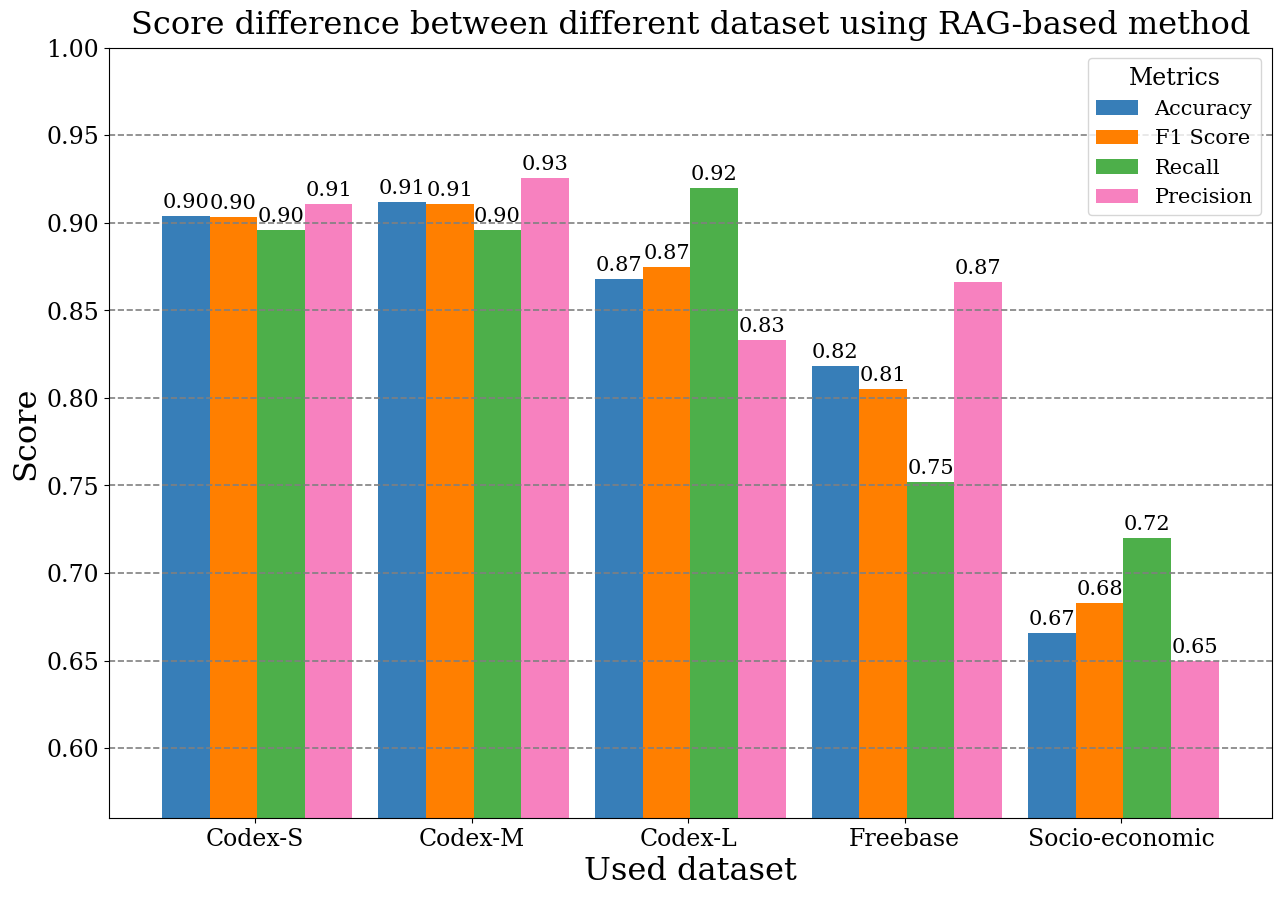

In [33]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 

# setup family font
plt.rc('font', family='serif',size=17)

plot_dict = res_dict.copy()

# get the different scores
accuracy_list = [val[0] for val in plot_dict.values()]
f1_list = [val[1] for val in plot_dict.values()]
recall_list = [val[2] for val in plot_dict.values()]
precision_list = [val[3] for val in plot_dict.values()]

# Create figure and axes
fig, ax = plt.subplots(1,1,figsize=(15, 10))

# set width of bar
# Set position of bar on X axis
barWidth = 0.22
x_acc = np.arange(len(accuracy_list)) 
x_f1 = [x + barWidth for x in x_acc] 
x_recall = [x + barWidth for x in x_f1]
x_prec = [x + barWidth for x in x_recall]

# create the bars
colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
bar_acc = plt.bar(x_acc, accuracy_list, color = colors[0], width = barWidth, 
        label ='Accuracy') 
bar_f1 = plt.bar(x_f1, f1_list, color = colors[1], width = barWidth, 
        label ='F1 Score') 
bar_recall = plt.bar(x_recall, recall_list, color = colors[2], width = barWidth, 
        label ='Recall')
bar_prec = plt.bar(x_prec, precision_list, color = colors[3], width = barWidth, 
        label ='Precision') 


# Set axis labels and title
label_fontsize = 23
ax.set_xlabel("Used dataset", fontsize = label_fontsize)
ax.set_ylabel("Score", fontsize = label_fontsize)
ax.set_title("Score difference between different dataset using RAG-based method", pad=10, fontsize = label_fontsize)

# Set y-limit to center data
comb_list = accuracy_list + f1_list + recall_list + precision_list
ax.set_ylim(min(comb_list) - np.std(list(comb_list)), min(1,max(comb_list) + np.std(list(comb_list))))

ax.set_xticks([r + 0.10+ barWidth for r in range(len(accuracy_list))], 
        ['Codex-S','Codex-M','Codex-L', 'Freebase', 'Socio-economic'])

# Add legend with title
ax.legend(title='Metrics', fontsize = 15, loc=1)


# add bar labels
bar_label_fontsize = 15
ax.bar_label(bar_acc, labels=[f'{v:.2f}' for v in accuracy_list], fontsize=bar_label_fontsize, padding=3)
ax.bar_label(bar_f1, labels=[f'{v:.2f}' for v in f1_list], fontsize=bar_label_fontsize, padding=3)
ax.bar_label(bar_recall, labels=[f'{v:.2f}' for v in recall_list], fontsize=bar_label_fontsize, padding=3)
ax.bar_label(bar_prec, labels=[f'{v:.2f}' for v in precision_list], fontsize=bar_label_fontsize, padding=3)

# Add gridlines (only on the y-axis)
ax.grid(linewidth=1.2, linestyle='--', axis='y', color='grey')
# save figure
plt.savefig('results/comparison_rag.png')
plt.show()

/var/folders/_3/wtwzgv1d3rlfz233qkf36kg00000gp/T/ipykernel_33085/1970017945.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  accuracy_list = [val[0] for val in plot_dict.values()]
/var/folders/_3/wtwzgv1d3rlfz233qkf36kg00000gp/T/ipykernel_33085/1970017945.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f1_list = [val[1] for val in plot_dict.values()]
/var/folders/_3/wtwzgv1d3rlfz233qkf36kg00000gp/T/ipykernel_33085/1970017945.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior)

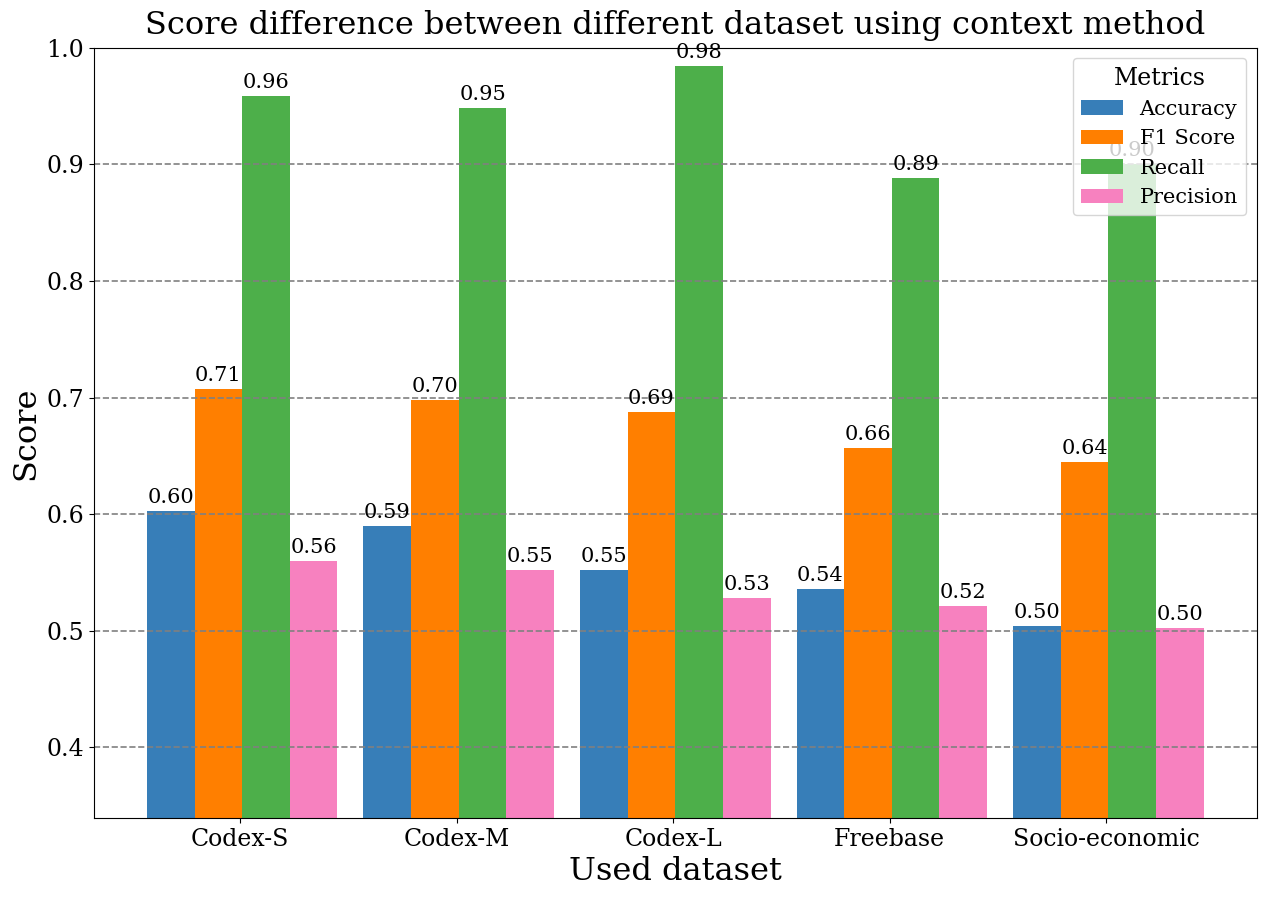

In [37]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 

# setup family font
plt.rc('font', family='serif',size=17)

plot_dict = res_context_dict.copy()

# get the different scores
accuracy_list = [val[0] for val in plot_dict.values()]
f1_list = [val[1] for val in plot_dict.values()]
recall_list = [val[2] for val in plot_dict.values()]
precision_list = [val[3] for val in plot_dict.values()]

# Create figure and axes
fig, ax = plt.subplots(1,1,figsize=(15, 10))

# set width of bar
# Set position of bar on X axis
barWidth = 0.22
x_acc = np.arange(len(accuracy_list)) 
x_f1 = [x + barWidth for x in x_acc] 
x_recall = [x + barWidth for x in x_f1]
x_prec = [x + barWidth for x in x_recall]

# create the bars
colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
bar_acc = plt.bar(x_acc, accuracy_list, color = colors[0], width = barWidth, 
        label ='Accuracy') 
bar_f1 = plt.bar(x_f1, f1_list, color = colors[1], width = barWidth, 
        label ='F1 Score') 
bar_recall = plt.bar(x_recall, recall_list, color = colors[2], width = barWidth, 
        label ='Recall')
bar_prec = plt.bar(x_prec, precision_list, color = colors[3], width = barWidth, 
        label ='Precision') 


# Set axis labels and title
label_fontsize = 23
ax.set_xlabel("Used dataset", fontsize = label_fontsize)
ax.set_ylabel("Score", fontsize = label_fontsize)
ax.set_title("Score difference between different dataset using context method", pad=10, fontsize = label_fontsize)

# Set y-limit to center data
comb_list = accuracy_list + f1_list + recall_list + precision_list
ax.set_ylim(min(comb_list) - np.std(list(comb_list)), min(1,max(comb_list) + np.std(list(comb_list))))

ax.set_xticks([r + 0.10+ barWidth for r in range(len(accuracy_list))], 
        ['Codex-S','Codex-M','Codex-L', 'Freebase', 'Socio-economic'])

# Add legend with title
ax.legend(title='Metrics', fontsize = 15, loc=1)


# add bar labels
bar_label_fontsize = 15
ax.bar_label(bar_acc, labels=[f'{v:.2f}' for v in accuracy_list], fontsize=bar_label_fontsize, padding=3)
ax.bar_label(bar_f1, labels=[f'{v:.2f}' for v in f1_list], fontsize=bar_label_fontsize, padding=3)
ax.bar_label(bar_recall, labels=[f'{v:.2f}' for v in recall_list], fontsize=bar_label_fontsize, padding=3)
ax.bar_label(bar_prec, labels=[f'{v:.2f}' for v in precision_list], fontsize=bar_label_fontsize, padding=3)

# Add gridlines (only on the y-axis)
ax.grid(linewidth=1.2, linestyle='--', axis='y', color='grey')
# save figure
#plt.savefig('results/comparison_rag.png')
plt.show()

/var/folders/_3/wtwzgv1d3rlfz233qkf36kg00000gp/T/ipykernel_33085/1648909303.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  accuracy_list = [val[0] for val in plot_dict.values()]
/var/folders/_3/wtwzgv1d3rlfz233qkf36kg00000gp/T/ipykernel_33085/1648909303.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f1_list = [val[1] for val in plot_dict.values()]
/var/folders/_3/wtwzgv1d3rlfz233qkf36kg00000gp/T/ipykernel_33085/1648909303.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior)

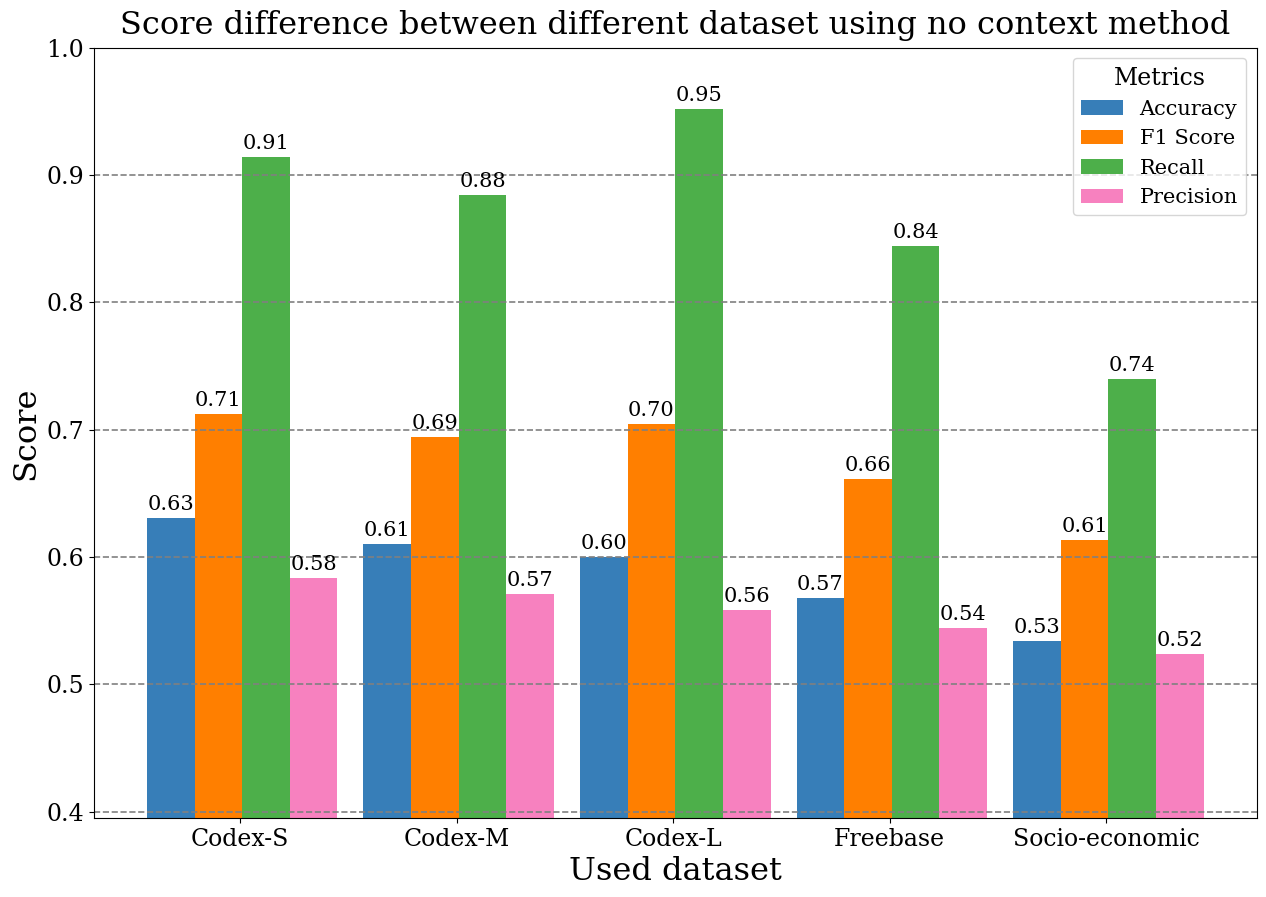

In [38]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 

# setup family font
plt.rc('font', family='serif',size=17)

plot_dict = res_no_context_dict.copy()

# get the different scores
accuracy_list = [val[0] for val in plot_dict.values()]
f1_list = [val[1] for val in plot_dict.values()]
recall_list = [val[2] for val in plot_dict.values()]
precision_list = [val[3] for val in plot_dict.values()]

# Create figure and axes
fig, ax = plt.subplots(1,1,figsize=(15, 10))

# set width of bar
# Set position of bar on X axis
barWidth = 0.22
x_acc = np.arange(len(accuracy_list)) 
x_f1 = [x + barWidth for x in x_acc] 
x_recall = [x + barWidth for x in x_f1]
x_prec = [x + barWidth for x in x_recall]

# create the bars
colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
bar_acc = plt.bar(x_acc, accuracy_list, color = colors[0], width = barWidth, 
        label ='Accuracy') 
bar_f1 = plt.bar(x_f1, f1_list, color = colors[1], width = barWidth, 
        label ='F1 Score') 
bar_recall = plt.bar(x_recall, recall_list, color = colors[2], width = barWidth, 
        label ='Recall')
bar_prec = plt.bar(x_prec, precision_list, color = colors[3], width = barWidth, 
        label ='Precision') 


# Set axis labels and title
label_fontsize = 23
ax.set_xlabel("Used dataset", fontsize = label_fontsize)
ax.set_ylabel("Score", fontsize = label_fontsize)
ax.set_title("Score difference between different dataset using no context method", pad=10, fontsize = label_fontsize)

# Set y-limit to center data
comb_list = accuracy_list + f1_list + recall_list + precision_list
ax.set_ylim(min(comb_list) - np.std(list(comb_list)), min(1,max(comb_list) + np.std(list(comb_list))))

ax.set_xticks([r + 0.10+ barWidth for r in range(len(accuracy_list))], 
        ['Codex-S','Codex-M','Codex-L', 'Freebase', 'Socio-economic'])

# Add legend with title
ax.legend(title='Metrics', fontsize = 15, loc=1)


# add bar labels
bar_label_fontsize = 15
ax.bar_label(bar_acc, labels=[f'{v:.2f}' for v in accuracy_list], fontsize=bar_label_fontsize, padding=3)
ax.bar_label(bar_f1, labels=[f'{v:.2f}' for v in f1_list], fontsize=bar_label_fontsize, padding=3)
ax.bar_label(bar_recall, labels=[f'{v:.2f}' for v in recall_list], fontsize=bar_label_fontsize, padding=3)
ax.bar_label(bar_prec, labels=[f'{v:.2f}' for v in precision_list], fontsize=bar_label_fontsize, padding=3)

# Add gridlines (only on the y-axis)
ax.grid(linewidth=1.2, linestyle='--', axis='y', color='grey')
# save figure
#plt.savefig('results/comparison_rag.png')
plt.show()